In [11]:
import numpy as np
import pandas as pd
import seaborn
import geopandas as gpd
import pysal
import mapclassify
import matplotlib.pyplot as plt
from pysal.explore import esda
from pysal.lib import weights
import time
import random
from shapely import wkt
from libpysal.weights import Queen, KNN
import seaborn
from shapely.geometry import Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib_scalebar.scalebar import ScaleBar
from esda.moran import Moran_Local_BV, Moran_BV, Moran_Local_BV, Moran, Moran_Local
from splot.esda import plot_local_autocorrelation, plot_moran_bv_simulation, plot_moran_bv, lisa_cluster, moran_scatterplot


In [12]:
gdfjoined1 = gpd.read_file( r"/Users/yuhan/Desktop/paper——revision/Dataprocess/jupitor/hazard_shp/states_sheldus_Climatological.shp")
gdfjoined1 = gdfjoined1.to_crs({'init':'epsg:4326'})
gdfjoined1.crs

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
gdfjoined1.columns

Index(['STATE', 'STATEABBRV', 'STATEFIPS', 'COUNTY', 'STCOFIPS', 'POPULATION',
       'BUILDVALUE', 'SOVI_SCORE', 'NAME', 'fips', 'level_0', 'index',
       'Hazard2', 'HMAprojAmo', 'NumPropert', 'NumHMA', 'CropDmg', 'CropDmg21',
       'CropDmgPer', 'PropertyDm', 'ProDmg21', 'ProDmgPerC', 'Injuries',
       'InjuriesPe', 'Fatalities', 'Fataliti_1', 'Duration_D', 'PAprojectA',
       'PDMprojAmo', 'PDMcount', 'PDMNumfina', 'HMAcount', 'HAtotal',
       'HAcount', 'PAcount', 'SBAcount', 'SBAProjcou', 'SBAapprove',
       'HazardCoun', 'x', 'y', 'totalAssis', 'totalAss_1', 'totalDamag',
       'logDamage', 'logHMAAmot', 'logPAAmot', 'logPDMAmot', 'logHAAmot',
       'logSBAAmot', 'HazardCate', 'csovi1', 'csovi2', 'csovi3', 'csovi4',
       'csovi5', 'cdamag1', 'cdamag2', 'cdamag3', 'cdamag4', 'cdamag5',
       'cdamsovi1', 'geometry'],
      dtype='object')

<Axes: >

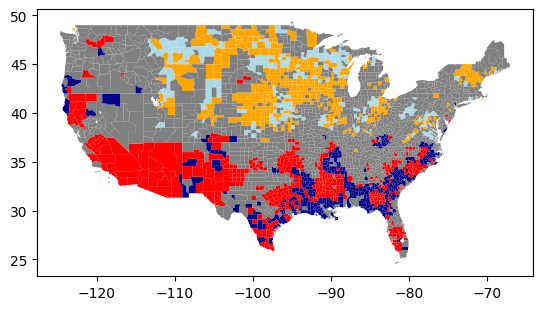

In [14]:
spots_labels = {
    0: "Non-Significant",
    1: "HH",
    2: "LH",
    3: "LL",
    4: "HL",
    6: "HL",
}

color_mapping = { 0: "grey", 1: "red", 2: "lightblue", 3: "darkblue", 4: "orange" , 6: "orange"  }

gdfjoined1.plot( color= gdfjoined1["cdamsovi1"].map( color_mapping ) )

In [15]:
gdfjoined2 = gpd.read_file( r"/Users/yuhan/Desktop/paper——revision/Dataprocess/jupitor/hazard_shp/states_sheldus_Geophysical.shp")
gdfjoined2 = gdfjoined1.to_crs({'init':'epsg:4326'})
gdfjoined2.crs

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

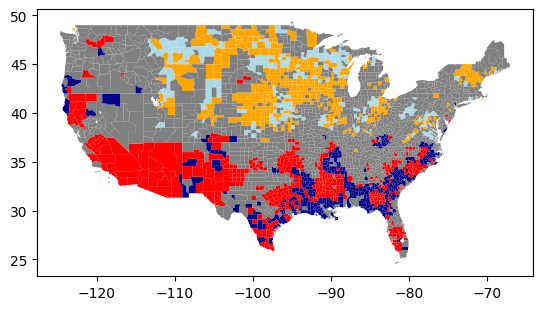

In [16]:
gdfjoined2.plot( color= gdfjoined2["cdamsovi1"].map( color_mapping ) )

In [17]:
gdfjoined3 = gpd.read_file( r"/Users/yuhan/Desktop/paper——revision/Dataprocess/jupitor/hazard_shp/states_sheldus_Hydrological.shp")
gdfjoined3 = gdfjoined3.to_crs({'init':'epsg:4326'})
gdfjoined3.crs

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
gdfjoined3.columns

Index(['STATE', 'STATEABBRV', 'STATEFIPS', 'COUNTY', 'STCOFIPS', 'POPULATION',
       'BUILDVALUE', 'SOVI_SCORE', 'NAME', 'fips', 'level_0', 'index',
       'Hazard2', 'HMAprojAmo', 'NumPropert', 'NumHMA', 'CropDmg', 'CropDmg21',
       'CropDmgPer', 'PropertyDm', 'ProDmg21', 'ProDmgPerC', 'Injuries',
       'InjuriesPe', 'Fatalities', 'Fataliti_1', 'Duration_D', 'PAprojectA',
       'PDMprojAmo', 'PDMcount', 'PDMNumfina', 'HMAcount', 'HAtotal',
       'HAcount', 'PAcount', 'SBAcount', 'SBAProjcou', 'SBAapprove',
       'HazardCoun', 'x', 'y', 'totalAssis', 'totalAss_1', 'totalDamag',
       'logDamage', 'logHMAAmot', 'logPAAmot', 'logPDMAmot', 'logHAAmot',
       'logSBAAmot', 'HazardCate', 'csovi1', 'csovi2', 'csovi3', 'csovi4',
       'csovi5', 'cdamag1', 'cdamag2', 'cdamag3', 'cdamag4', 'cdamag5',
       'cdamsovi1', 'geometry'],
      dtype='object')

<Axes: >

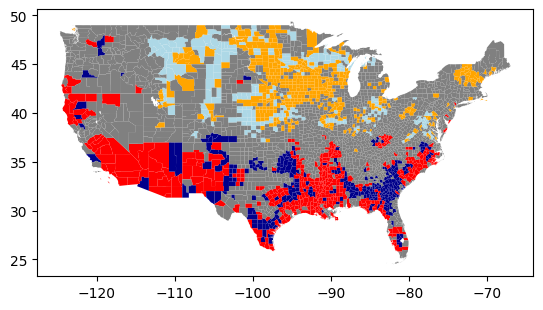

In [19]:
gdfjoined3.plot( color= gdfjoined3["cdamsovi1"].map( color_mapping ) )

In [20]:
gdfjoined4 = gpd.read_file( r"/Users/yuhan/Desktop/paper——revision/Dataprocess/jupitor/hazard_shp/states_sheldus_Meteorological.shp")
gdfjoined4 = gdfjoined4.to_crs({'init':'epsg:4326'})
gdfjoined4.crs

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

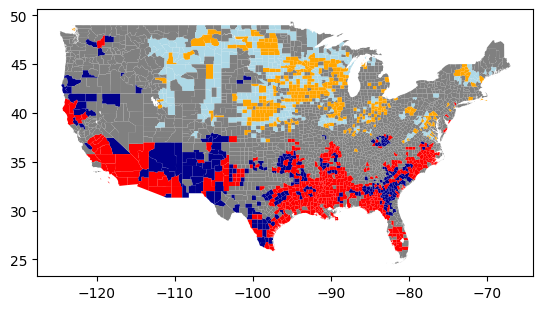

In [21]:
gdfjoined4.plot( color= gdfjoined4["cdamsovi1"].map( color_mapping ) )